Data Head:
   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4

<ipython-input-4-1fca768a125f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=health_data, palette="BuGn_r")


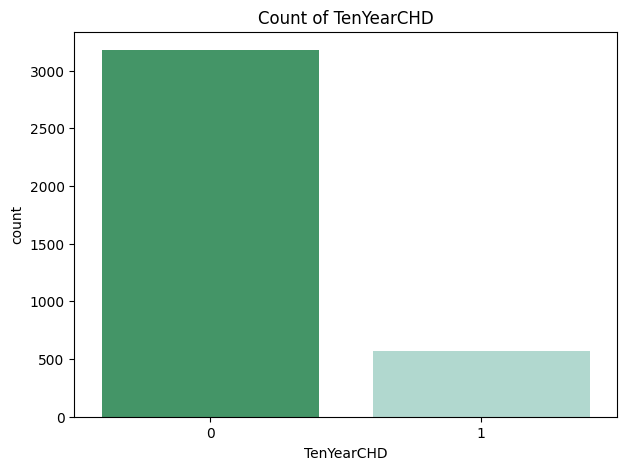

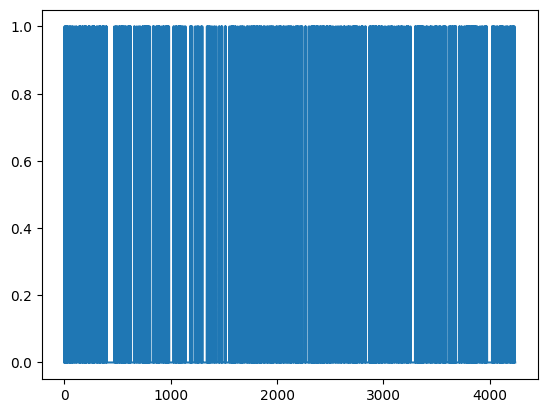

Model Accuracy = 0.8490230905861457


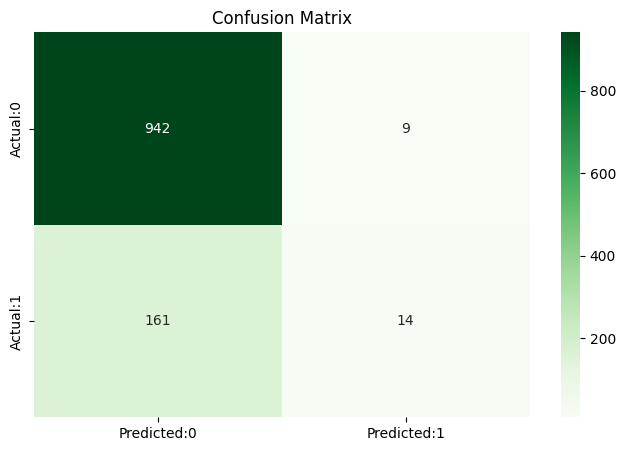

Confusion Matrix Details:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
health_data = pd.read_csv("/content/framingham.csv")
health_data.drop(['education'], inplace=True, axis=1)
health_data.rename(columns={'male': 'Sex_male'}, inplace=True)

# Removing NaN / NULL values
health_data.dropna(axis=0, inplace=True)
print("Data Head:")
print(health_data.head())
print("\nDataset Shape:", health_data.shape)
print("\nTenYearCHD Value Counts:")
print(health_data.TenYearCHD.value_counts())

# Features and target variable
features = np.asarray(health_data[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
target = np.asarray(health_data['TenYearCHD'])

# Normalization of the dataset
features = preprocessing.StandardScaler().fit(features).transform(features)

# Train-and-Test Split
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=4)

print("\nTrain set shape:", features_train.shape, target_train.shape)
print("Test set shape:", features_test.shape, target_test.shape)

# Counting number of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=health_data, palette="BuGn_r")
plt.title("Count of TenYearCHD")
plt.show()
laste = health_data['TenYearCHD'].plot()
plt.show(laste)
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
target_pred = logistic_model.predict(features_test)

# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Model Accuracy =', accuracy_score(target_test, target_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(target_test, target_pred)
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix")
plt.show()

print('Confusion Matrix Details:')
print(classification_report(target_test, target_pred))
